# Data Science pipeline to solve employee attrition problem



Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

1. Expensive in terms of both money and time to train new employees.
2. Loss of experienced employees
3. Impact in productivity
4. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

“Good data science is more about the questions you pose of the data rather than data munging and analysis” — Riley Newman

### Business questions to brainstorm:

1. What factors are contributing more to employee attrition?
2. What type of measures should the company take in order to retain their employees?
3. What business value does the model bring?
4. Will the model save lots of money?
5. Which business unit faces the attrition problem?


### Data Science Process Pipeline 

<img src="https://github.com/IBM/employee-attrition-aif360/raw/master/doc/source/images/pipeline.png" width="800" />

Above image explains the steps involved in solving a data science problem. It starts from data extraction to result interpretation. Once the model produces acceptable performance, it can be deployed in real-time. 

In [1]:
!pip install sklearn

### Let's solve employee attrition problem...

In [2]:
!pip install pygal

     |████████████████████████████████| 133kB 2.8MB/s 


In [3]:
!pip install seaborn

In [4]:
!pip install bokeh

In [5]:
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
import json
#Visulaization libraries
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.palettes import Viridis5
import seaborn as sns
import matplotlib.pyplot as plt
import pygal
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#model developemnt libraries
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report

from IPython.display import SVG, display
import warnings
warnings.filterwarnings("ignore")
#deployment library
from watson_machine_learning_client import WatsonMachineLearningAPIClient

ModuleNotFoundError: ignored

## 1.  Data Collection

- Source: Kaggle
- Data: IBM HR Analytics dataset (synthetically generated)
  https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home
- License: 
    *  Database: https://opendatacommons.org/licenses/odbl/1.0/
    *  Contents: https://opendatacommons.org/licenses/dbcl/1.0/

#### Rule of thumb
* Know all the available dataset for the problem (database/ internet/ third party etc) . Dataset must be reliable and   authentic.
* Extract data in a format that can be used
* Required Skills for data extraction in general(mostly used and not specific to the pattern):
   - Distributed Storage: Hadoop, Apache Spark.
   - Database Management: MySQL, PostgresSQL, MongoDB.
   - Know to querying Relational Databases and retrieve unstructured Data like text, videos, audio files, documents.

#### Download dataset 

In [6]:
!wget https://github.com/IBM/employee-attrition-aif360/raw/master/data/emp_attrition.csv --output-document=emp_attrition.csv

--2020-03-13 18:17:49--  https://github.com/IBM/employee-attrition-aif360/raw/master/data/emp_attrition.csv
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/emp_attrition.csv [following]
--2020-03-13 18:17:49--  https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/emp_attrition.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227977 (223K) [text/plain]
Saving to: ‘emp_attrition.csv’

emp_attrition.csv   100%[===================>] 222.63K  --.-KB/s    in 0.05s   

2020-03-13 18:17:50 (4.36 MB/s) - ‘emp_attrition.csv’ saved [227977/

In [7]:
#Reading csv file in pandas dataframe format. 
df_data = pd.read_csv('emp_attrition.csv')
df_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
#Get list of columns in the dataset
df_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [0]:
#Dropping columns (intution)
columns = ['DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
        'Over18', 'RelationshipSatisfaction', 'StandardHours']
df_data.drop(columns, inplace=True, axis=1)

### 1.1 Get description of data

Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Reference link: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [9]:
#This will give description only for numeric fields
df_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
#To get description of all columns
df_data.describe(include = 'all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,NaN,NaN,2,NaN,NaN,9,NaN,3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,NaN,Male,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,NaN,NaN,882,NaN,NaN,326,NaN,673,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,2.721769,NaN,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,2.693197,NaN,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,1.024165,1.093082,NaN,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,2.498009,NaN,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,2.000000,NaN,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,1.000000,NaN,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,3.000000,NaN,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,2.000000,NaN,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,4.000000,NaN,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,4.000000,NaN,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## 2. Data Cleaning

This phase is the most time consuming yet the most importat one. Here, we filter and extract only the information that is needed for problem solving. Quality of the model is highly dependant on the quality of the data that is given as an input. 
* Understand meaning of every feature and identify errors.
* Look for any missing values and find a way to fill the missing values.
* Remove duplicate or corrupted records.
* Scaling and normalization of data.
* Character encoding (string to numerical representation).
* Handle inconsistent entry.
* Use tools like pandas(python), dplyr(R), numpy.

### 2.1 Handling missing values

In [0]:
#Find number of missing values in every feature
df_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Looks like the best dataset!!! No null values :-)

#### But what if we have null values ???? Let's see what we can do in that case.

* Find why that data is missing. Human error or missed during extraction
* Drop missing values. 
* Some ways for filling missing values: 
  - Zero 
  - Mean ( works with normal distribution )
  - Random values from same distribution ( works well with equal distribution ) 
  - Value after missing value (make sense if data set has some logical order)

### 2.2 Encode categorical features(in string) as most of the tools works with numbers

In [0]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [12]:
#Deep copy the original data
data_encoded = df_data.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df_data[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [13]:
data_encoded.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,2,0,3,2,7,4,2,5993,8,1,11,3,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,3,1,2,2,6,2,1,5130,1,0,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,1,2,1,2,3,2,2090,6,1,15,3,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,4,0,3,1,6,3,1,2909,1,1,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,1,1,3,1,2,2,1,3468,9,0,12,3,1,6,3,3,2,2,2,2


## 3. Data Exploration

* Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
   -  Univariate analysis 
      * Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
      * Categorical variable : Bar chart showing frequency in each category 
   -  Bivariate analysis
      * Continous & Continous : Scatter plots to know how continous variables interact with each other
      * Categorical & categorical : Stacked column chart to show how the frequencies are spread between two  
        categorical variables
      * Categorical & Continous : Boxplots, Swamplots or even bar charts
* Detect outliers
* Feature engineering 

### 3.1 Get data distribution between output classes

In [14]:
data_encoded['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

From the above result, we can find that about 82% of people stick to the company while rest of them quit :-(


**** Data is unbalanced ****

### 3.2 Finding correlation between variables

In [0]:
data_correlation = data_encoded.corr()

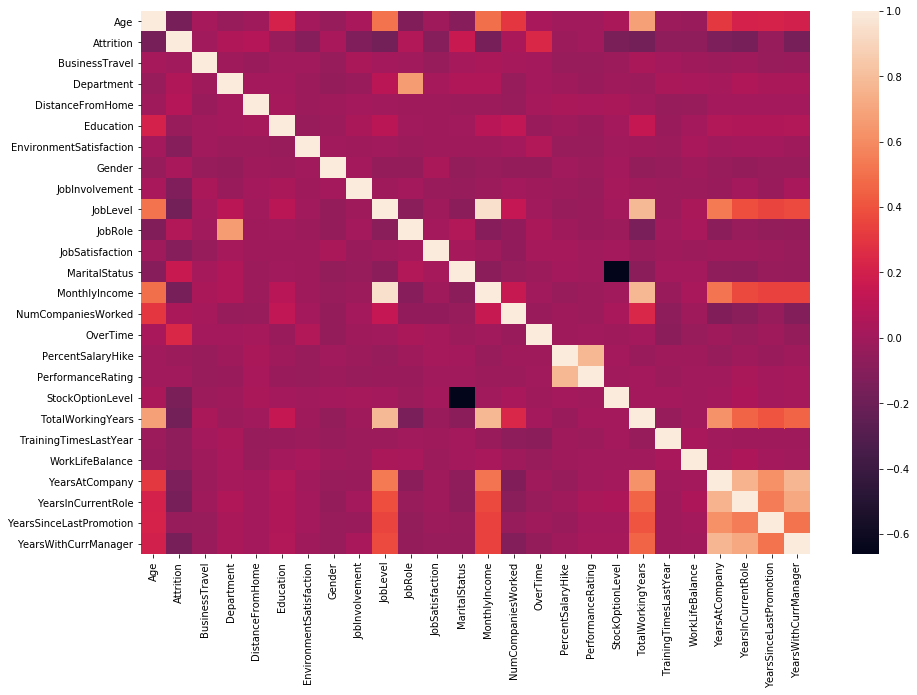

In [16]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

#### Analysis of correlation results (sample analysis)

- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

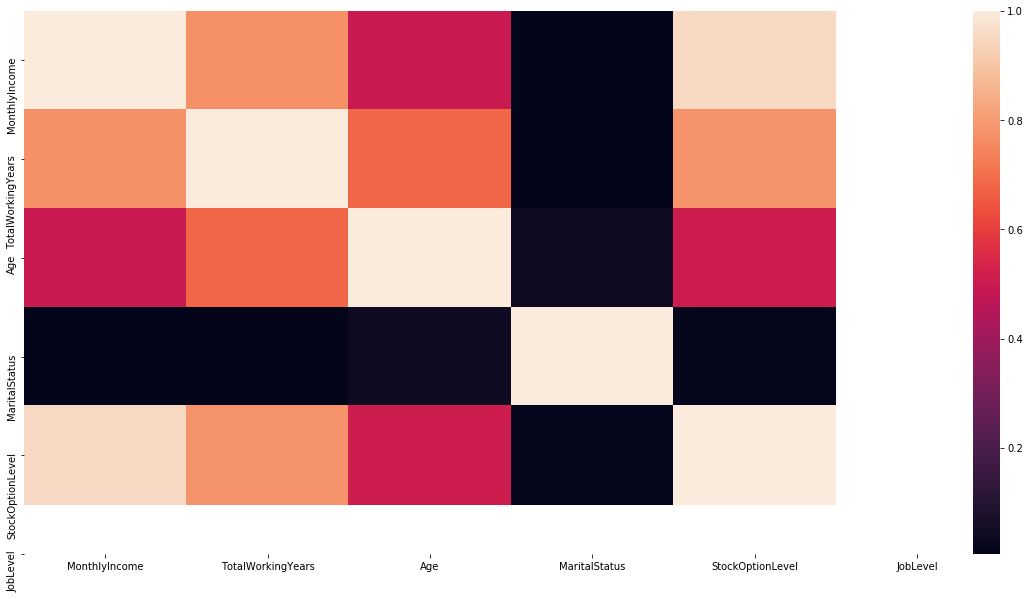

In [17]:
#Viewing the analysis obtained above 
data_corr_filtered = df_data[['MonthlyIncome', 'TotalWorkingYears', 'Age', 'MaritalStatus', 'StockOptionLevel',
                      'JobLevel']]
correlation = data_corr_filtered.corr()
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(correlation,xticklabels=data_corr_filtered.columns,yticklabels=data_corr_filtered.columns)

### 3.3 Understanding relationship between features and finding patterns in data through visualization

Popular data visualization libraries in python are:
     1. Matplotlib
     2. Seaborn
     3. ggplot
     4. Bokeh
     5. pygal
     6. Plotly
     7. geoplotlib
     8. Gleam
     9. missingno
     10. Leather

### 3.3.1 Age Analysis
Finding relationship between age and attrition. 

(array([  0.,  17., 309., 622., 349., 168.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

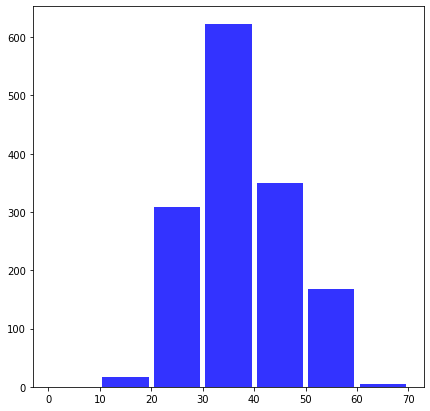

In [18]:
#Plot to see distribution of age overall
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(data_encoded['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')

#### Finding based on above plot
This plot tells that there are more employees in the range of 30 to 40. Approximately 45% of employees fall in this range.

In [0]:
#We are going to bin age (multiples of 10) to see which age group are likely to leave the company.
#Before that, let us take only employee who are likely to quit.
positive_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 1]
negative_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 0]

(array([ 0., 10., 81., 89., 34., 23.,  0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

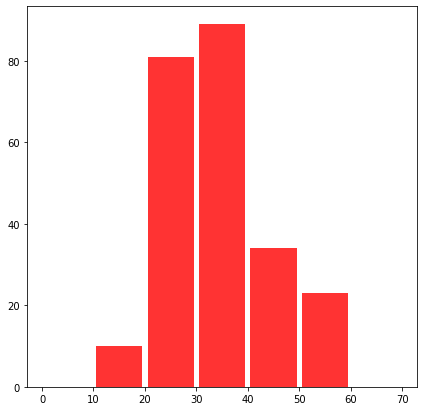

In [21]:
plt.hist(positive_attrition_df['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

#### Findings based on above plot
- Employees whose age is in the range of 30 - 40 are more likely to quit.
- Employees in the range of 20 to 30 are also equally imposing the threat to employers.

### 3.3.2 Business Travel vs Attrition
There are 3 categories in this:
    1. No travel (0).
    2. Travel Frequently (1).
    3. Travel Rarely (2).
Attrition: No = 0 and Yes = 1

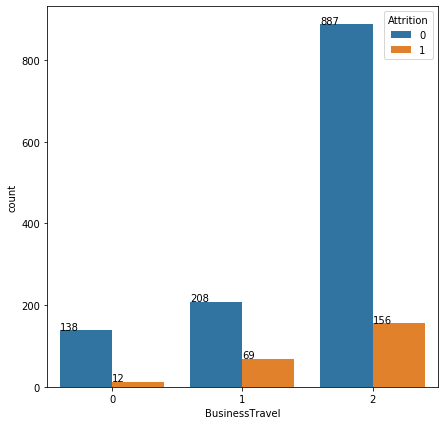

In [22]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

#### Findings
From the above plot it can be inferred that travel can not be a compelling factor for attrition. Employee who travel rarely are likely to quit more

### 3.3.3 Department Vs Attrition
There are three categories in department:
       1. Human Resources: 0
       2. Research & Development: 1
       3. Sales: 2
Attrition: No = 0 and Yes = 1

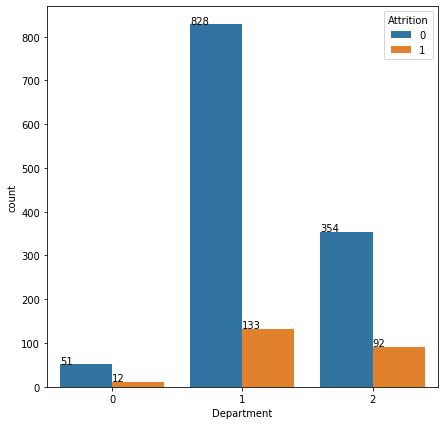

In [23]:
ax = sns.countplot(x="Department", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

#### Inference:
    1. 56% of employess from research and development department are likely to quit.
    2. 38% of employees from sales department are likely to quit.

### 3.3.4 Distance from home Vs Employee Attrition

(array([807., 246., 180.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

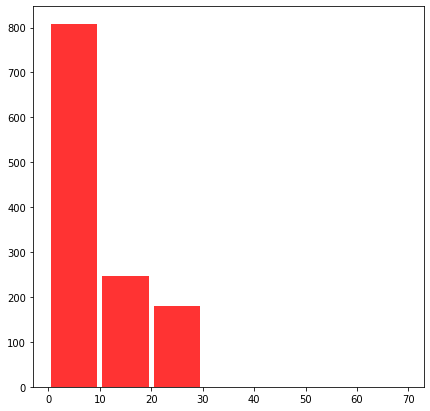

In [24]:
plt.hist(negative_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

(array([133.,  55.,  49.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

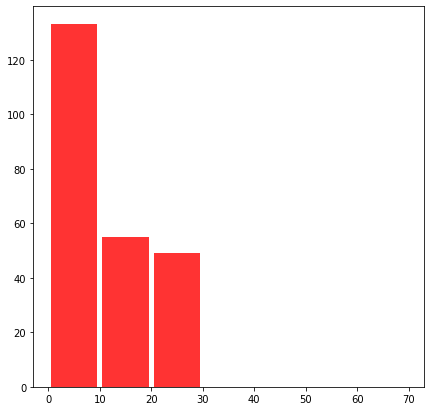

In [26]:
plt.hist(positive_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

#### Findings
People who live closeby (0-10 miles) are likely to quit more based on the data

### 3.3.5 Education vs Attrition
There are five categories: 
     1. Below College - 1 
     2. College - 2
     3. Bachelor - 3
     4. Master - 4
     5. Doctor - 5

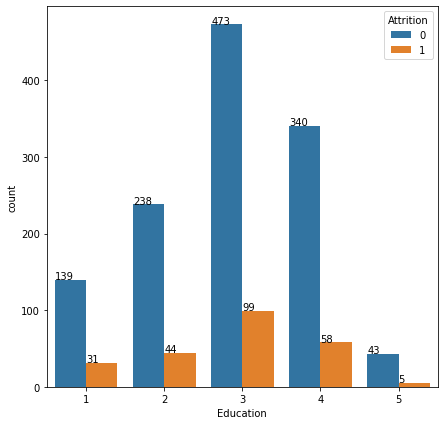

In [27]:
ax = sns.countplot(x="Education", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Inference:
    1. 41% of employees having bachelor's degree are likely to quit.
    2. 24% of employees having master's are the next in line

### 3.3.6 Gender vs Attrition

In [0]:
df_age = data_encoded.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4

In [0]:
df_age = pd.DataFrame({'count': df_age.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_age['Gender-attrition'] = df_age['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [30]:
df_age

,Gender,Attrition,count,Gender-attrition
0,0,0,501,0-0
1,0,1,87,0-1
2,1,0,732,1-0
3,1,1,150,1-1


Here,

* Gender - 0 and Attrition - 0 ===> Female employees who will stay
* Gender - 0 and Attrition - 1 ===> Female employees who will leave
* Gender - 1 and Attrition - 0 ===> Male employees who will stay
* Gender - 1 and Attrition - 1 ===> Male employees who will leave

In [31]:
output_notebook() 

# x and y axes
Gender_Attrition = df_age['Gender-attrition'].tolist()
count = df_age['count'].tolist()

print(count)

# Bokeh's mapping of column names and data lists
source = ColumnDataSource(data=dict(Gender_Attrition=Gender_Attrition, count=count, color=Viridis5))

plot_bar = figure(x_range=Gender_Attrition, plot_height=350, title="Counts")

# Render and show the vbar plot
plot_bar.vbar(x='Gender_Attrition', top='count', width=0.9, color='color', source=source)
show(plot_bar)


[501, 87, 732, 150]


#### Findings

From the above plot, we can infer that male employees are likely to leave organization as they amount to 63% compared to female who have 36 % attrition rate.

### 3.3.7 Job Role Vs Attrition

Categories in job role:
* Healthcare Representative : 0 
* Human Resources : 1
* Laboratory Technician : 2
* Manager : 3 
* Manufacturing Director : 4
* Research Director : 5
* Research Scientist : 6
* Sales Executive : 7 
* Sales Representative : 8

In [0]:
df_jrole = pd.DataFrame({'count': data_encoded.groupby(["JobRole", "Attrition"]).size()}).reset_index()

In [0]:
#Considering attrition case
df_jrole_1 = df_jrole.loc[df_jrole['Attrition'] == 1]

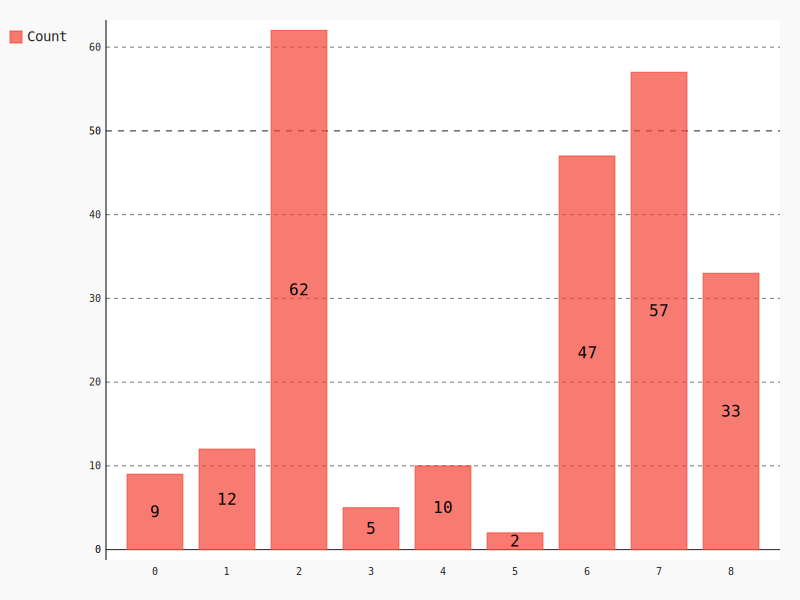

In [34]:
import pygal
chart = pygal.Bar(print_values=True)
chart.x_labels = map(str, range(0,9))
chart.add('Count', df_jrole_1['count'])
#chart.render()
display(SVG(chart.render(disable_xml_declaration=True)))

#### Findings:
Top three roles facing attrition
- 26% of employees who are likely to quit belong to Laboratory Technician group
- 24% of employees belong to Sales Executive group
- 19% of employees belong to Research Scientist group

### 3.3.8 Marital Status vs Attrition

Categories:
    1. 'Divorced': 0
    2. 'Married' : 1
    3. 'Single'  : 2

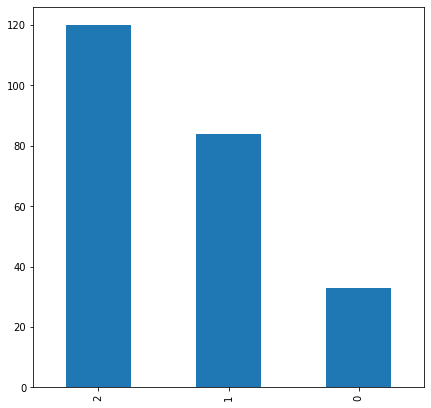

In [35]:
#analyzing employees who has positive attrition

positive_attrition_df['MaritalStatus'].value_counts().plot(kind='bar')

#### Inference:
Nearly 50 % of the employees who are single are likely to quit

### 3.3.9 Monthly Income vs Attrition

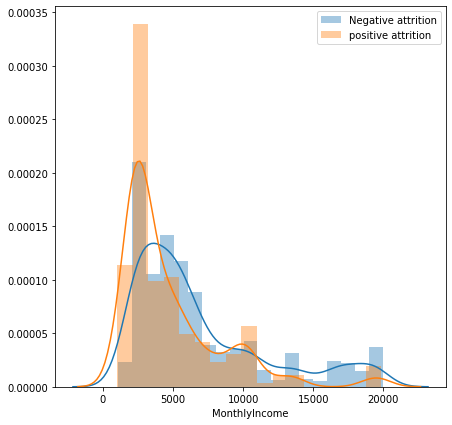

In [36]:
sns.distplot(negative_attrition_df['MonthlyIncome'], label='Negative attrition')
sns.distplot(positive_attrition_df['MonthlyIncome'], label='positive attrition')
plt.legend()
plt.show()

Inference:
    Looks like people who are less likely to leave the company are the ones who are less paid.

## 4. Model Development

## 4.1 Extracting label from input data

In [0]:
input_data = data_encoded.drop(['Attrition'], axis=1)

In [38]:
input_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1,2,2,0,3,2,7,4,2,5993,8,1,11,3,0,8,0,1,6,4,0,5
1,49,1,1,8,1,3,1,2,2,6,2,1,5130,1,0,23,4,1,10,3,3,10,7,1,7
2,37,2,1,2,2,4,1,2,1,2,3,2,2090,6,1,15,3,0,7,3,3,0,0,0,0
3,33,1,1,3,4,4,0,3,1,6,3,1,2909,1,1,11,3,0,8,3,3,8,7,3,0
4,27,2,1,2,1,1,1,3,1,2,2,1,3468,9,0,12,3,1,6,3,3,2,2,2,2


In [0]:
target_data = data_encoded[['Attrition']]

In [40]:
target_data.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [41]:
len(input_data.columns)

25

## 4.2 Feature Selection

It is the process of choosing the best features that can be used in the predictive modeling. 

1. Fight against the curse of dimensionality.
2. Reduce the overall training time.
3. Defense against overfitting.
4. Increase model generalizability.

Some of the feature selection methods are,
1. Filter methods
   - F Test
   - Mutual information
   - Variance threshold
   - Chi Square
   - Correlation coefficient 
   - ANNOVA
   - LDA
2. Wrapper methods
   - Forward search
   - Backward selection
   - Recursive feature elimination
3. Embedded methods
   - LASSO Linear Regression

In [42]:
input_data.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [0]:
col_values = list(input_data.columns.values)

#### chi-square

chi-square test is applied to test the independence of two events. This method is used to evaluate the likelihood of correlation or association between features using their frequency distribution. This works best with categorial features.

In [44]:
#gives top 10 features having maximum chi-square value
feature_scores = chi2(input_data, target_data)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:17]:
    print(fname, score)

MonthlyIncome 127922.29369381821
TotalWorkingYears 230.72161773754925
YearsAtCompany 142.10005430324915
YearsInCurrentRole 117.5225958913567
YearsWithCurrManager 110.6715338985734
Age 84.15527681001525
OverTime 63.84506671452294
DistanceFromHome 63.77214163101213
StockOptionLevel 25.26882603175403
JobLevel 24.93924234571862
MaritalStatus 18.745657458341153
JobRole 9.004448467467538
YearsSinceLastPromotion 7.601723473243281
JobSatisfaction 7.011946634881222
EnvironmentSatisfaction 6.890594338387591
NumCompaniesWorked 6.438654443594589
JobInvolvement 4.60561606667209


In [45]:
df_data.shape

(1470, 26)

In [0]:
#column selection based on feature selection 
data_selected = data_encoded[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'StockOptionLevel',
                      'JobLevel', 'JobRole', 'WorkLifeBalance', 'Gender', 'Attrition']]

In [64]:
data_selected.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender,Attrition
0,5993,8,6,4,5,41,1,1,0,2,7,1,0,1
1,5130,10,10,7,7,49,0,8,1,2,6,3,1,0
2,2090,7,0,0,0,37,1,2,0,1,2,3,1,1
3,2909,8,8,7,0,33,1,3,0,1,6,3,0,0
4,3468,6,2,2,2,27,0,2,1,1,2,3,1,0


In [65]:
len(data_selected.columns)

14

In [66]:
data_selected.shape

(1470, 14)

In [0]:
input_data = data_selected.drop(['Attrition'], axis=1)
target_data = data_selected[['Attrition']]

In [69]:
input_data.dtypes

MonthlyIncome           int64
TotalWorkingYears       int64
YearsAtCompany          int64
YearsInCurrentRole      int64
YearsWithCurrManager    int64
Age                     int64
OverTime                int64
DistanceFromHome        int64
StockOptionLevel        int64
JobLevel                int64
JobRole                 int64
WorkLifeBalance         int64
Gender                  int64
dtype: object

#### Get Train, Validation and test data

In [0]:
train_data = data_selected[0:1400]
train_input_data = train_data.drop(['Attrition'], axis=1)
train_target_data = train_data[['Attrition']]

In [127]:
#Using 1 sample as test data to check deployment
test_data = data_selected[1400:]
print('Shape of the test data is ', test_data.shape)
test_input_data = test_data.drop(['Attrition'], axis=1)
print('Shape of the test input data is ', test_input_data.shape)
test_target_data = test_data[['Attrition']]
print('Shape of the test target data is ', test_target_data.shape)


Shape of the test data is  (70, 14)
Shape of the test input data is  (70, 13)
Shape of the test target data is  (70, 1)


## 4.4 Algorithm 

This is a highly unbalanced data. Class 0 covers 83.88% of the data whereas class 1 covers 16.12% of the data. Following are the few ways to handle unbalance data.

1. Data Level Approach
   - Random under-sampling
   - Cluster based over sampling
   - Synthetic Minority Over-sampling Technique
   - Modified Synthetic Minority Over-sampling Technique
2. Algorithm Ensemble
   - Bagging
   - Boosting
     - Adaptive Boosting (Ada-boost)
     - Gradient Tree Boosting
     - XGBoost
     
     
In our model, XGBoost ensemble technique is used.



Many weak and inaccurate classifiers are combined to produce a highly accurate prediction. The classifer is serially trained. Samples that are misclassified in previous round are given more focus. Initially weight is equal for all the samples. Weight of misclassified instances are increased each time and weight of correctly classified instances are decreased, this will let more misclassfied sampled to be selected for the next round. After each classifier is trained, the weight is assigned to the classifier as well based on accuracy. More accurate classifier is assigned higher weight so that it will have more impact in final outcome.

In [58]:
!pip install xgboost



In [0]:
import xgboost

In [0]:
#n_estimators is the maximum number of estimators at which the boosting is terminated. Default is 50 and this can be tuned as well.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Classification model can be evaluated using different metrics. Some of the important metrics are:
    1. Confusion matrix
    2. Accuracy
    3. Precision
    4. Recall
    5. Specificity
    6. F1-Score
here we are using accuracy

In [132]:
#finding best estimator
#tune other parameters for better accuracy
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'estimator':[100, 150, 200,300, 400, 500,600,800,1000]
}
gsearch1 = GridSearchCV(estimator = xgboost.XGBClassifier( learning_rate =0.02, n_estimators=140, max_depth=5,
 min_child_weight=1,objective= 'binary:logistic',seed=27), 
 param_grid = param_test1, scoring='accuracy',iid=False, cv=5)
gsearch1.fit(train_input_data,train_target_data)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.02, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=None,
             param_grid={'estimator': [100, 150, 200, 300, 400, 500, 600, 800,
                                       1000],
                         'max_depth': range(3, 10, 2),
     

In [133]:
 gsearch1.best_params_, gsearch1.best_score_

({'estimator': 100, 'max_depth': 9, 'min_child_weight': 5}, 0.8514285714285714)

In [146]:
#Choose the best estimator value from above and replace the 'num_of_estimators' with the value.and other parameters
num_of_estimators =100
cls = xgboost.XGBClassifier(learning_rate=0.02, n_estimators=num_of_estimators, objective='binary:logistic',max_depth=9, min_child_weight=5,seed=27)
cls.fit(train_input_data, train_target_data)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=1, verbosity=1)

For better accuracy,
1. Tune hyper-parameters.
2. Try above mentioned methods for handling unbalanced data.

In [147]:
predict=cls.predict(test_input_data)
predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [154]:
from sklearn.metrics import accuracy_score
s=accuracy_score(test_target_data,predict)
print('accuracy={}%'.format(s*100))

accuracy=90.0%


# 5. Inference

1. Factors contributing more to the employee attrition are MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, 
   YearsWithCurrManager, Age, OverTime, DistanceFromHome, StockOptionLevel, JobLevel, JobRole, WorkLifeBalance, Gender.
2. Top three roles facing attrition
   - 26% of employees who are likely to quit belong to Laboratory Technician group.
   - 24% of employees belong to Sales Executive group.
   - 19% of employees belong to Research Scientist group.
   (other inferences are mentioned below each graph)
3. The model developed will be able to predict whether an employee will stay or not. This will help company to know the status of an     
   employee in advance and take necessary actions to prevent loss that will incur.

# 6. Deployment 

Authenticate to the Watson Machine Learning service. Enter the credentials needed. Credentials can be retrieved from the 'Service Credentials' tab of the service instance instance

<img src="https://github.com/IBM/employee-attrition-aif360/raw/master/doc/source/images/deploy.png" width="400" />

  
  
Replace the information in the following cell with your Watson Machine Learning (WML) credentials.

You can find these credentials in your WML instance dashboard under the Service credentials tab.

```
wml_credentials = {
    "username": "------------",
    "password": "------------",
    "instance_id": "------------",
    "url": "------------"
}
```

In [0]:
# for security credentials are not provided
wml_credentials = {
}

In [0]:
#Create WML API Client
client = WatsonMachineLearningAPIClient(wml_credentials)

In [0]:
#Create metadata that can be used for creating and saving the custom library. Here, it is for pipeline label encoder.
#Give the path of the custom package (zip). 
library_metadata = {
        client.runtimes.LibraryMetaNames.VERSION: "1.0",
        client.runtimes.LibraryMetaNames.PLATFORM: {"name": "python", "versions": ["3.5"]}
    }
#Store library
custom_library_details = client.runtimes.store_library(library_metadata)
#Retrieve library uid from the details
custom_library_uid = client.runtimes.get_library_uid(custom_library_details)
print("Custom Library UID is: " + custom_library_uid)

In [0]:
#Define metadata required for creating runtime resource. Yse custom library uid obtained from above step to bind the custom library.
#Runtime resource that is being defined here will be used for configuring online deployment runtime environment
runtimes_meta = {
    client.runtimes.ConfigurationMetaNames.NAME: "Employee_Attrition", 
    client.runtimes.ConfigurationMetaNames.DESCRIPTION: "Data Science Life Cycle explained through employee attrition problem", 
    client.runtimes.ConfigurationMetaNames.PLATFORM: { "name": "python", "version": "3.5" }, 
    client.runtimes.ConfigurationMetaNames.LIBRARIES_UIDS: [custom_library_uid]
}

In [0]:
#create runtime resource
runtime_resource_details = client.runtimes.store(runtimes_meta)
runtime_resource_details

In [0]:
#From the runtime resource retrieve url and uid 
runtime_url = client.runtimes.get_url(runtime_resource_details)
print("Runtimes resource URL: " + runtime_url)
runtime_uid = client.runtimes.get_uid(runtime_resource_details)
print("Runtimes resource UID: " + runtime_uid)

In [0]:
#client.repository is used for storing and managing the model, definitions, runtime requirements details in WML repository
#This metadata associates model with runtime resources
model_property = {client.repository.ModelMetaNames.NAME: "Employee attrition Model",
               client.repository.ModelMetaNames.RUNTIME_UID: runtime_uid
              }
published_model = client.repository.store_model(model=model_pipeline, meta_props=model_property)

In [0]:
#get uid for the stored model
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

In [0]:
#create deployment
created_deployment = client.deployments.create(published_model_uid, name="Emp_attrition_model")

In [0]:
#get scoring end point
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

In [0]:
#Testing deployment
scoring_payload = {'fields': ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'Age', 'OverTime',
       'DistanceFromHome', 'StockOptionLevel', 'JobLevel', 'JobRole',
       'WorkLifeBalance', 'Gender'], 
                   'values': [[4404, 6, 4, 3, 2, 34, 'No', '8', 0, 2, 'Laboratory Technician', 4, 'Male']]}

In [0]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [0]:
print('prediction',json.dumps(predictions, indent=2))

**Interpreting the results:**

In the "values" list, the first value indicates the predicted result - 
    
    0 represents negative employee attrition (employee will stay)
    
    1 represents positive employee attrition (employee will quit)


Next in the list will be the probablities for each of the results -
    
    The first entry (class 0) represents probability of negative employee attrition
    
    The second entry (class 1) represents probability of positive employee attrition
